Two Samples t-test
=================
Often we want to examine if the mean from one sample is the same as the mean from another. A rejection of this hypothesis is sufficient evidence to suggest the two samples may in fact come from two different population. We will first consider the simple case where the two samples are independent and have equal variance. 
Consider the hypothesis
$$H_0: \mu_1-\mu_2 = 0$$
$$H_1: \mu_1 - \mu_2 \neq 0$$

In [1]:
#import the usual modules
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N=30 #set the number of observations
mu = 3 #set the mean of the population
sigma = 2 #set the standard deviation of the population 
samples = sps.norm.rvs(size=(2,N),loc=mu,scale=sigma)

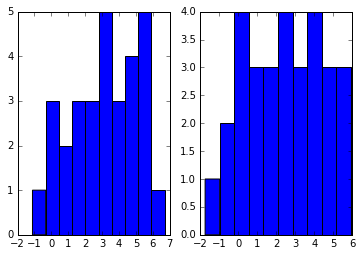

In [3]:
for i in range(0,2): #using the for loop to generate subplots. 
    plt.subplot(1,2,i+1) #Use subplot to divide the output into two halves. 
    plt.hist(samples[i])

In [4]:
sample_means = np.mean(samples,axis=1)
sample_variances = np.var(samples, axis=1, ddof=1)
print('The sample means are {0:.4f} and {1:.4f}'.format(*sample_means))
print('The sample variances are {0:.4f} and {1:.4f}'.format(*sample_variances))

The sample means are 3.1671 and 2.4126
The sample variances are 4.1217 and 4.4228


In [5]:
alpha = 0.05 #set the significance of the test. 
#calculate the t-statistics
ttest = (sample_means[0]-sample_means[1])/np.power(2*(np.mean(sample_variances))/N, 0.5) 
cv = sps.t.isf([1-alpha/2,alpha/2], df=2*(N-1))
pvalue = 2*(1-sps.t.cdf(abs(ttest),df=2*(N-1)))
print('The t-statistics is {0:.4f} with critival values {1:.4f} and {2:.4f}. P-value is {3:.4f}'.format(ttest,*cv,pvalue))

The t-statistics is 1.4138 with critival values -2.0017 and 2.0017. P-value is 0.1628


Exercise
========
Can you replicate the results above using the scipy.stats.ttest_ind() function? 


Now let's see how this test work when the samples are in fact drawn from two different distributions. 

In [6]:
diff = 3
mu2 = mu + diff #creating new mean 
#stack an additional sample at the bottom of the existing samples. The last sample came from different population. 
samples = np.r_[samples, sps.norm.rvs(size=N, loc=mu2, scale=sigma).reshape(1,N)] 

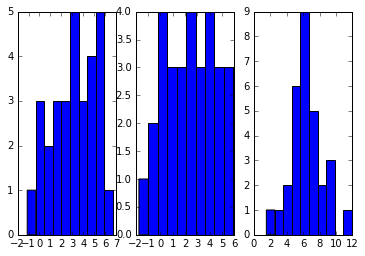

In [7]:
for i in range(0,samples.shape[0]): #using the for loop to generate subplots. 
    plt.subplot(1,samples.shape[0],i+1) #Use subplot to divide the output into two halves. 
    plt.hist(samples[i])

In [8]:
results_diff02 = sps.ttest_ind(samples[0], samples[2]) #testing first sample against third.
results_diff12 = sps.ttest_ind(samples[1], samples[2]) #testing second sample against third.
print(results_diff02)
print(results_diff12)

Ttest_indResult(statistic=-6.1756725171488993, pvalue=6.983088162958481e-08)
Ttest_indResult(statistic=-7.4906946999681958, pvalue=4.3880239193931111e-10)
